In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1: HANDLING MISSING VALUES IN LOAN APPLICATION DATA

In this scenario, you are tasked with cleaning loan application data by handling missing values. The dataset contains:

LoanID: Unique identifier for each loan.

ApplicantIncome: Applicant's income.

LoanAmount: The loan amount requested.

CreditHistory: Categorical value indicating good (1) or bad (0) credit history.

Techniques used:

Mean Imputation: Replace missing values with the mean for continuous variables without outliers.

Median Imputation: Use median when outliers are present.

Mode Imputation: Replace missing categorical values with the most frequent value.

Forward and Backward Fill: Propagate previous/next valid observation.

Interpolation: Estimate missing values by creating a linear trend.



In [2]:
# Load dataset
loan_data = pd.read_csv('loan_data.csv')

# Check for missing values
print("Missing values before imputation:")
print(loan_data.isnull().sum())

Missing values before imputation:
LoanID              0
ApplicantIncome    10
LoanAmount          6
CreditHistory      20
dtype: int64


In [3]:
# Imputation techniques
loan_data['ApplicantIncome'].fillna(loan_data['ApplicantIncome'].mean(), inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['CreditHistory'].fillna(loan_data['CreditHistory'].mode()[0], inplace=True)


<ipython-input-3-daa7d3f0710a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['ApplicantIncome'].fillna(loan_data['ApplicantIncome'].mean(), inplace=True)
<ipython-input-3-daa7d3f0710a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

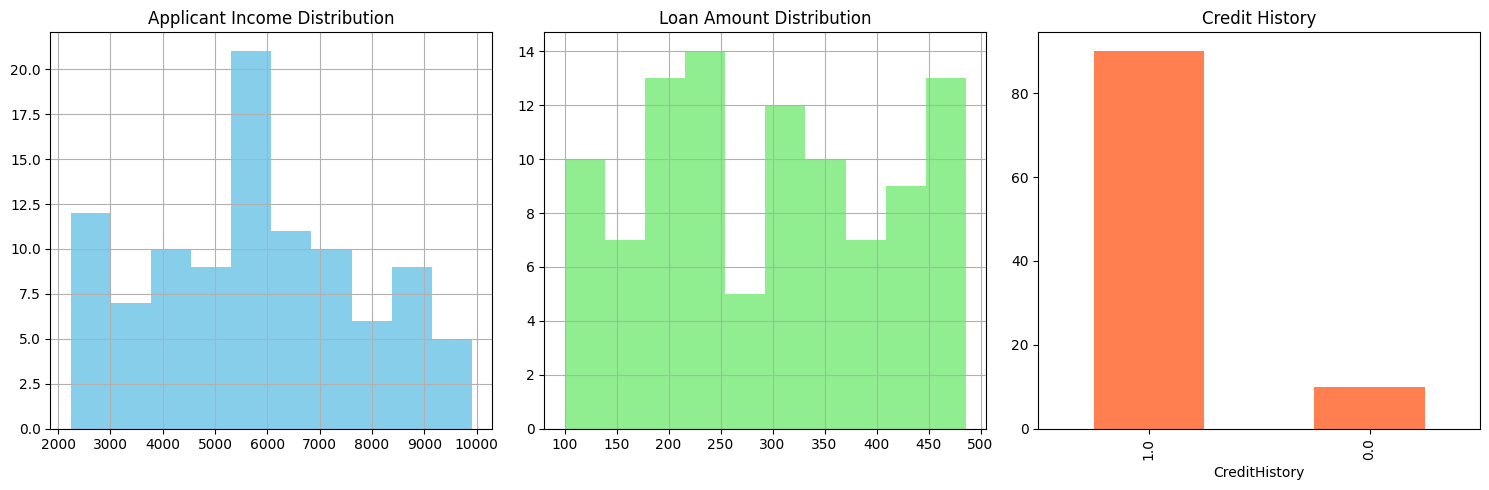

In [4]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

loan_data['ApplicantIncome'].hist(ax=axes[0], color='skyblue')
axes[0].set_title('Applicant Income Distribution')

loan_data['LoanAmount'].hist(ax=axes[1], color='lightgreen')
axes[1].set_title('Loan Amount Distribution')

loan_data['CreditHistory'].value_counts().plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title('Credit History')

plt.tight_layout()
plt.show()

In [5]:
# Output cleaned dataset
print("\nMissing values after imputation:")
print(loan_data.isnull().sum())


Missing values after imputation:
LoanID             0
ApplicantIncome    0
LoanAmount         0
CreditHistory      0
dtype: int64


Q2: CUSTOMER CHURN RATE ANALYSIS FOR CHURNFLIX

This scenario involves analyzing customer churn in a subscription-based streaming service. The dataset contains:

CustomerID: Unique identifier.

StartDate: Subscription start date.

EndDate: Subscription end date (NaN indicates active subscription).

SubscriptionPlan: Type of plan (Premium, Basic).

Objective:

Calculate monthly churn rate.

Use a pivot table to analyze churn by subscription plan.

In [7]:
import pandas as pd
import numpy as np

# Load dataset
customers = pd.read_csv('customer_info.csv')

# Convert dates to datetime format
customers['StartDate'] = pd.to_datetime(customers['StartDate'], format='%d-%m-%Y')
customers['EndDate'] = pd.to_datetime(customers['EndDate'], format='%d-%m-%Y', errors='coerce')

# Calculate churn status
customers['Churned'] = customers['EndDate'].notnull()

# Monthly churn rate calculation
customers['ChurnMonth'] = customers['EndDate'].dt.to_period('M')
churn_rate = customers.groupby('ChurnMonth')['CustomerID'].nunique() / len(customers) * 100

# Pivot table for subscription plans
pivot = customers.pivot_table(index=customers['StartDate'].dt.to_period('M'),
                              columns='SubscriptionPlan',
                              values='CustomerID',
                              aggfunc='count')

print("\nMonthly Churn Rate:")
print(churn_rate)
print("\nSubscription Plan Pivot Table:")
print(pivot)


Q3: FITNESS MEMBERSHIP PRO RETENTION ANALYSIS

You are analyzing membership retention for FitnessPro, a fitness company. The dataset includes:

MemberID: Unique identifier.

JoinDate: Date of membership.

ActivityDate: Dates of activities performed.

Objective:

Identify members active for 6 consecutive months.

Calculate retention rates.

In [ ]:
# Load datasets
members = pd.read_csv('member_info.csv')
activity = pd.read_csv('activity_info.csv')

# Convert dates to datetime
members['JoinDate'] = pd.to_datetime(members['JoinDate'], format='%d-%m-%Y')
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%d-%m-%Y')

# Extract month-year
members['JoinMonth'] = members['JoinDate'].dt.to_period('M')
activity['ActivityMonth'] = activity['ActivityDate'].dt.to_period('M')

# Merge datasets
data = pd.merge(activity, members, on='MemberID')

# Filter activity within 6 months of joining
data = data[(data['ActivityMonth'] >= data['JoinMonth']) &
            (data['ActivityMonth'] <= data['JoinMonth'] + 5)]

# Calculate retention
retention = data.groupby('MemberID')['ActivityMonth'].nunique() == 6
retention_rate = retention.mean() * 100

print(f"\nFitnessPro Membership Retention Rate: {retention_rate:.2f}%")


Q4: CRYPTO CURRENCY MARKET ANALYSIS

You are analyzing the cryptocurrency market, focusing on Bitcoin. The dataset includes:

Date: Date of the record.

Cryptocurrency: Name of the crypto (e.g., Bitcoin).

MarketCap: Market capitalization.

Volume24h: Trading volume in 24 hours.

PriceUSD: Price in USD.

Objective:

Clean data by removing invalid rows.

Calculate Bitcoin's daily percentage market cap change.

Correlation between Bitcoin's market cap and volume.

Rolling average of Bitcoin's price.

In [ ]:
# Load datasets
members = pd.read_csv('member_info.csv')
activity = pd.read_csv('activity_info.csv')

# Convert dates to datetime
members['JoinDate'] = pd.to_datetime(members['JoinDate'], format='%d-%m-%Y')
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%d-%m-%Y')

# Extract month-year
members['JoinMonth'] = members['JoinDate'].dt.to_period('M')
activity['ActivityMonth'] = activity['ActivityDate'].dt.to_period('M')

# Merge datasets
data = pd.merge(activity, members, on='MemberID')

# Filter activity within 6 months of joining
data = data[(data['ActivityMonth'] >= data['JoinMonth']) &
            (data['ActivityMonth'] <= data['JoinMonth'] + 5)]

# Calculate retention
retention = data.groupby('MemberID')['ActivityMonth'].nunique() == 6
retention_rate = retention.mean() * 100

print(f"\nFitnessPro Membership Retention Rate: {retention_rate:.2f}%")
